## Group Name : Unfiltered Commentary

- Raees Moosa : 2322203
- Oriinga Maudu : 2433303
- Tumi Jourdan : 2180153

In [61]:
import numpy as np
import imageio
from glob import glob
from skimage import img_as_float32
from natsort import natsorted
import matplotlib.pyplot as plt
import cv2
from typing import Tuple

In [62]:
path_pairs = list(zip(
natsorted(glob('./puzzle_corners_1024x768/images-1024x768/*.png')),
natsorted(glob('./puzzle_corners_1024x768/masks-1024x768/*.png')),
))
imgs = np.array([img_as_float32(imageio.imread(ipath)) for ipath, _ in path_pairs])
msks = np.array([img_as_float32(imageio.imread(mpath)) for _, mpath in path_pairs])

C:\Users\Oriin\AppData\Local\Temp\ipykernel_36036\1865243255.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imgs = np.array([img_as_float32(imageio.imread(ipath)) for ipath, _ in path_pairs])
C:\Users\Oriin\AppData\Local\Temp\ipykernel_36036\1865243255.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  msks = np.array([img_as_float32(imageio.imread(mpath)) for _, mpath in path_pairs])


In [63]:
def get_puzzle_contour(mask):
    mask_uint8 = cv2.convertScaleAbs(mask)
    return cv2.findContours(mask_uint8,cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [64]:
def get_clockwise_contour(contours):
    if cv2.contourArea(contours,oriented=True)<0:
        return contours[::-1]
    return Tuple(contours)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


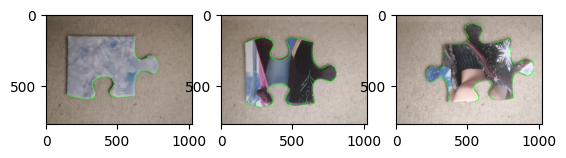

In [70]:
#Show Contours
for i in range(3):
    contours, hier = get_puzzle_contour(msks[i])
    contours = get_clockwise_contour(contours[0])
    plt.subplot(1,3,i+1), plt.imshow(cv2.drawContours(imgs[i], contours, -1, (0,255,0), 3))
